In [2]:
import zipfile
zip=zipfile.ZipFile('face-mask-dataset.zip')
zip.extractall()
zip.close()

without_mask
data/without_mask/without_mask_1634.jpg


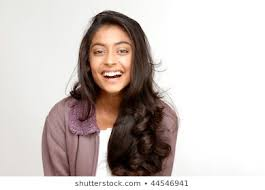

In [3]:
import random
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2 as cv
choices=['with_mask','without_mask'] 

choice=random.randint(0,1)
num=random.randint(1000,1800)
num=str(num)
dir='data'+'/'+choices[choice]+'/'+choices[choice]+'_'+num+'.jpg'
print(choices[choice])
print(dir)
img=cv.imread(dir)  
cv2_imshow(img)

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D

In [5]:
train=image_dataset_from_directory('data',
                                   batch_size=32, 
                                   label_mode='binary',
                                   image_size=(224, 224), seed=42, 
                                   validation_split=0.2, subset="training")
test=image_dataset_from_directory('data', 
                                   batch_size=32, 
                                   label_mode='binary',
                                   image_size=(224, 224), seed=42, 
                                   validation_split=0.2, subset="validation")


Found 7553 files belonging to 2 classes.
Using 6043 files for training.
Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [ ]:
for images, labels in train.take(1):
  print(images, labels)

tf.Tensor(
[[[[ 90.         99.        104.       ]
   [ 90.50893    99.50893   104.50893  ]
   [ 91.        100.        105.       ]
   ...
   [119.         81.        102.       ]
   [118.50891    80.50891   101.50891  ]
   [117.16965    79.16965   100.16965  ]]

  [[ 90.         99.        104.       ]
   [ 90.50893    99.50893   104.50893  ]
   [ 91.        100.        105.       ]
   ...
   [118.28013    80.28013   101.28013  ]
   [117.25891    79.25891   100.25891  ]
   [115.91965    77.91965    98.91965  ]]

  [[ 90.         99.        104.       ]
   [ 90.50893    99.50893   104.50893  ]
   [ 91.        100.        105.       ]
   ...
   [116.723206   78.723206   99.723206 ]
   [115.38391    77.38391    98.38391  ]
   [114.04465    76.04465    97.04465  ]]

  ...

  [[ 89.         90.         84.       ]
   [ 88.49107    89.49107    83.49107  ]
   [ 87.15179    88.15179    82.15179  ]
   ...
   [ 28.         43.         62.       ]
   [ 28.         43.         62.       ]
   [ 

In [6]:
model_1=Sequential([
    Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')

])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

model_1.fit(train,
            epochs=5,
            steps_per_epoch=len(train),
            validation_data=test,
            validation_steps=len(test))

Epoch 1/5
189/189 [==============================] - 28s 97ms/step - loss: 5.4188 - accuracy: 0.7286 - val_loss: 0.5004 - val_accuracy: 0.7695
Epoch 2/5
189/189 [==============================] - 18s 93ms/step - loss: 0.4280 - accuracy: 0.8211 - val_loss: 0.3132 - val_accuracy: 0.8894
Epoch 3/5
189/189 [==============================] - 18s 92ms/step - loss: 0.2677 - accuracy: 0.9000 - val_loss: 0.3376 - val_accuracy: 0.8715
Epoch 4/5
189/189 [==============================] - 18s 92ms/step - loss: 0.1699 - accuracy: 0.9408 - val_loss: 0.2461 - val_accuracy: 0.9199
Epoch 5/5
189/189 [==============================] - 18s 94ms/step - loss: 0.1765 - accuracy: 0.9345 - val_loss: 0.3933 - val_accuracy: 0.8927


In [7]:
model_3=Sequential([
    Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(32,3,activation='relu'),
    MaxPool2D(),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')

])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

model_3.fit(train,
            epochs=5,
            steps_per_epoch=len(train),
            validation_data=test,
            validation_steps=len(test))

Epoch 1/5
189/189 [==============================] - 19s 97ms/step - loss: 1.3190 - accuracy: 0.8418 - val_loss: 0.2314 - val_accuracy: 0.9119
Epoch 2/5
189/189 [==============================] - 18s 95ms/step - loss: 0.2069 - accuracy: 0.9244 - val_loss: 0.1671 - val_accuracy: 0.9351
Epoch 3/5
189/189 [==============================] - 18s 92ms/step - loss: 0.1544 - accuracy: 0.9444 - val_loss: 0.2026 - val_accuracy: 0.9199
Epoch 4/5
189/189 [==============================] - 18s 93ms/step - loss: 0.1332 - accuracy: 0.9520 - val_loss: 0.1560 - val_accuracy: 0.9397
Epoch 5/5
189/189 [==============================] - 18s 95ms/step - loss: 0.1072 - accuracy: 0.9616 - val_loss: 0.1666 - val_accuracy: 0.9377


In [8]:
model_2=Sequential([
    Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(),
    Conv2D(128,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')

])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

model_2.fit(train,
            epochs=5,
            steps_per_epoch=len(train),
            validation_data=test,
            validation_steps=len(test))

Epoch 1/5
189/189 [==============================] - 26s 128ms/step - loss: 19.9684 - accuracy: 0.6452 - val_loss: 0.5464 - val_accuracy: 0.7424
Epoch 2/5
189/189 [==============================] - 23s 120ms/step - loss: 0.4672 - accuracy: 0.7973 - val_loss: 0.3254 - val_accuracy: 0.8795
Epoch 3/5
189/189 [==============================] - 23s 121ms/step - loss: 0.7474 - accuracy: 0.7443 - val_loss: 0.3570 - val_accuracy: 0.8523
Epoch 4/5
189/189 [==============================] - 23s 121ms/step - loss: 0.2963 - accuracy: 0.8818 - val_loss: 0.2691 - val_accuracy: 0.8960
Epoch 5/5
189/189 [==============================] - 23s 120ms/step - loss: 0.2509 - accuracy: 0.9015 - val_loss: 0.2430 - val_accuracy: 0.9007


In [9]:
model_4=Sequential([
    Conv2D(16,6,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(32,6,activation='relu'),
    MaxPool2D(),
    Conv2D(32,6,activation='relu'),
    MaxPool2D(),
    Conv2D(64,6,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')

])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

model_4.fit(train,
            epochs=5,
            steps_per_epoch=len(train),
            validation_data=test,
            validation_steps=len(test))
#model_3.save('classsfication_model_face.h5')

Epoch 1/5
189/189 [==============================] - 23s 106ms/step - loss: 1.2474 - accuracy: 0.7994 - val_loss: 0.2523 - val_accuracy: 0.9026
Epoch 2/5
189/189 [==============================] - 19s 96ms/step - loss: 0.2307 - accuracy: 0.9093 - val_loss: 0.1587 - val_accuracy: 0.9437
Epoch 3/5
189/189 [==============================] - 19s 97ms/step - loss: 0.1980 - accuracy: 0.9274 - val_loss: 0.1431 - val_accuracy: 0.9543
Epoch 4/5
189/189 [==============================] - 19s 97ms/step - loss: 0.1856 - accuracy: 0.9340 - val_loss: 0.1803 - val_accuracy: 0.9338
Epoch 5/5
189/189 [==============================] - 19s 96ms/step - loss: 0.1559 - accuracy: 0.9436 - val_loss: 0.1899 - val_accuracy: 0.9205


In [10]:
model_5=Sequential([
    Conv2D(32,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(),
    Conv2D(64,3,activation='relu'),
    MaxPool2D(),
    Conv2D(128,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')

])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

model_5.fit(train,
            epochs=5,
            steps_per_epoch=len(train),
            validation_data=test,
            validation_steps=len(test))

Epoch 1/5
189/189 [==============================] - 23s 113ms/step - loss: 0.8008 - accuracy: 0.8433 - val_loss: 0.2196 - val_accuracy: 0.9106
Epoch 2/5
189/189 [==============================] - 21s 110ms/step - loss: 0.2271 - accuracy: 0.9128 - val_loss: 0.2318 - val_accuracy: 0.9106
Epoch 3/5
189/189 [==============================] - 22s 112ms/step - loss: 0.1830 - accuracy: 0.9365 - val_loss: 0.1567 - val_accuracy: 0.9371
Epoch 4/5
189/189 [==============================] - 21s 111ms/step - loss: 0.1535 - accuracy: 0.9426 - val_loss: 0.1603 - val_accuracy: 0.9377
Epoch 5/5
189/189 [==============================] - 22s 112ms/step - loss: 0.1074 - accuracy: 0.9636 - val_loss: 0.1258 - val_accuracy: 0.9550


In [11]:
model_1.evaluate(test)
model_2.evaluate(test)
model_3.evaluate(test)
model_4.evaluate(test)
model_5.evaluate(test)

48/48 [==============================] - 3s 56ms/step - loss: 0.1258 - accuracy: 0.9550


[0.12580396234989166, 0.9549669027328491]

In [12]:
model_5.save('face_mask.h5')

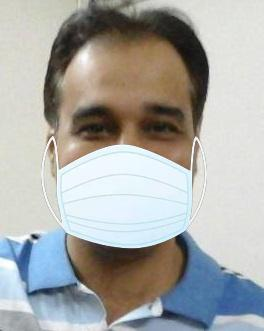

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
[[0.29478264]]


In [33]:
choices=['with_mask','without_mask'] 
dims=224
choice=random.randint(0,1)
num=random.randint(1000,1800)
num=str(num)
dir='data'+'/'+choices[choice]+'/'+choices[choice]+'_'+num+'.jpg'
img=cv.imread(dir)

resized_image = cv.resize(img,(dims,dims),interpolation=cv.INTER_AREA)
  #resized_image=resized_image/resized_image.max()
  #resized_image=tf.cast(tf.constant(resized_image),dtype=tf.float32) 
resized_image=tf.expand_dims(resized_image,axis=0)
c=model_5.predict(resized_image)
cv2_imshow(img)
print(tf.round(c))
print(c)

In [ ]:
train.class_names

['with_mask', 'without_mask']